In [4]:
import pandas as pd

In [6]:
file_path = 'diabetes_prediction_dataset.csv'
data = pd.read_csv(file_path)

In [12]:
!pip install tensorflow

In [13]:
import tensorflow as tf
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import datetime
import shutil
import os

## Training an Artifical Neural Network 

In [31]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


## Preprocessing dataset 

In [34]:
# One-Hot Encode 'gender' column
data = pd.get_dummies(data, columns=['gender'])
data.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,80.0,0,1,never,25.19,6.6,140,0,True,False,False
1,54.0,0,0,No Info,27.32,6.6,80,0,True,False,False
2,28.0,0,0,never,27.32,5.7,158,0,False,True,False
3,36.0,0,0,current,23.45,5.0,155,0,True,False,False
4,76.0,1,1,current,20.14,4.8,155,0,False,True,False


In [36]:
# Ordinal Encode 'smoking_history' column
smoking_mapping = {'never': 0, 'former': 1, 'current': 2, 'ever': 3, 'not current': 4, 'No Info': 5} # Handle null as a new type
data['smoking_history'] = data['smoking_history'].map(smoking_mapping)
data.head()

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other
0,80.0,0,1,0,25.19,6.6,140,0,True,False,False
1,54.0,0,0,5,27.32,6.6,80,0,True,False,False
2,28.0,0,0,0,27.32,5.7,158,0,False,True,False
3,36.0,0,0,2,23.45,5.0,155,0,True,False,False
4,76.0,1,1,2,20.14,4.8,155,0,False,True,False


In [38]:
# Separate features and target variable
X = data.iloc[:, :-1]  # All columns except the last one (target)
y = data.iloc[:, -1]   # The last column (target)

In [40]:
# Standard scaler for numeric features

# Identify numeric features for scaling
numeric_features = X.select_dtypes(include=['number']).columns.tolist()

# Standardize the numeric features
scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

In [42]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
print("Train set size: ",len(X_train))
print("Test set size: ",len(X_test))

Train set size:  80000
Test set size:  20000


In [46]:
# Create the ANN Architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

C:\Users\GGC\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Set up tensorboard for visualization
log_dir = "logs/fit/"
if os.path.exists(log_dir):
    shutil.rmtree(log_dir)  # Remove the log directory if it exists

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
log_dir = log_dir + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

In [52]:
# Train the model & visualize the loss & accuracy by epoch
history = model.fit(X_train, y_train, epochs=5, batch_size=32,
                    validation_split=0.1, callbacks=[tensorboard_callback])

%load_ext tensorboard
%tensorboard --logdir logs/fit

Epoch 1/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9801 - loss: 0.0562 - val_accuracy: 0.9999 - val_loss: 7.0381e-04
Epoch 2/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.9999 - loss: 9.6679e-04 - val_accuracy: 0.9999 - val_loss: 4.7593e-04
Epoch 3/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9998 - loss: 6.4157e-04 - val_accuracy: 1.0000 - val_loss: 6.8751e-05
Epoch 4/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 1.0000 - loss: 7.3143e-05 - val_accuracy: 1.0000 - val_loss: 7.5674e-06
Epoch 5/5
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 1.0000 - loss: 5.2196e-06 - val_accuracy: 1.0000 - val_loss: 2.2874e-06


In [54]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 3.2969e-06
Test Loss: 2.2021813492756337e-05
Test Accuracy: 1.0


## Working with images using Convolutional Neural Networks 

In [57]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

In [59]:
# Load the pretrained ResNet50 model
model = ResNet50(weights='imagenet')
model.summary()

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 66s 1us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_1[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

136948/136948 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 5us/step


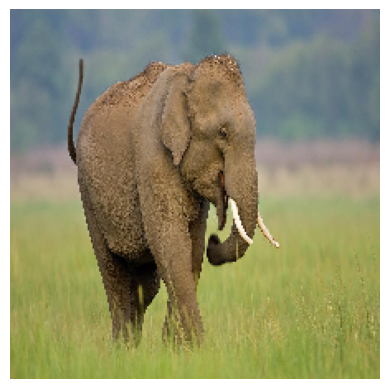

Predictions for image from URL: https://images.fineartamerica.com/images/artworkimages/mediumlarge/2/indian-elephant-ab-apana.jpg
  tusker: 0.46
  African_elephant: 0.34
  Indian_elephant: 0.20
55629/55629 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step


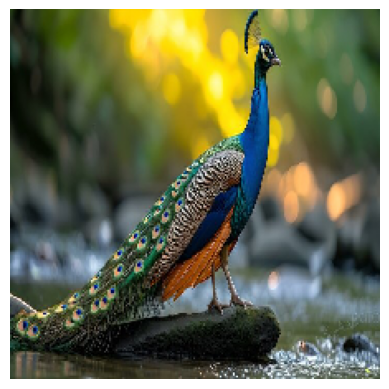

Predictions for image from URL: https://t4.ftcdn.net/jpg/07/31/31/75/360_F_731317593_pnUKrpPenCFvsuN5PjyuEiAdYmYiaKCR.jpg
  peacock: 1.00
  agama: 0.00
  drake: 0.00
3416014/3416014 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


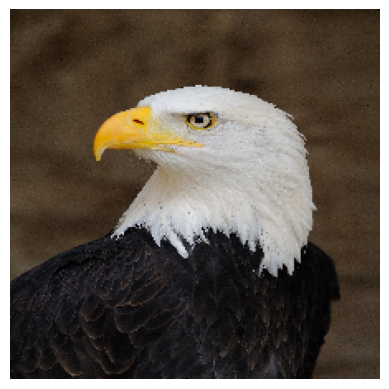

Predictions for image from URL: https://upload.wikimedia.org/wikipedia/commons/1/1e/Bald_Eagle_Portrait.jpg
  bald_eagle: 1.00
  kite: 0.00
  vulture: 0.00
314509/314509 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step


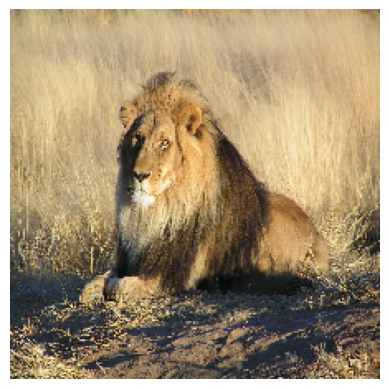

Predictions for image from URL: https://upload.wikimedia.org/wikipedia/commons/7/73/Lion_waiting_in_Namibia.jpg
  lion: 1.00
  cheetah: 0.00
  collie: 0.00


In [61]:
# URLs of example images commonly used in ImageNet
image_urls = [
    'https://images.fineartamerica.com/images/artworkimages/mediumlarge/2/indian-elephant-ab-apana.jpg',
    'https://t4.ftcdn.net/jpg/07/31/31/75/360_F_731317593_pnUKrpPenCFvsuN5PjyuEiAdYmYiaKCR.jpg',
    'https://upload.wikimedia.org/wikipedia/commons/1/1e/Bald_Eagle_Portrait.jpg',
    'https://upload.wikimedia.org/wikipedia/commons/7/73/Lion_waiting_in_Namibia.jpg'
]

def load_image_from_url(url):
    # Download the image from the URL and load it
    img_path = tf.keras.utils.get_file(origin=url)
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img, preprocess_input(img_array)

# Process each image, make predictions, and display results
for url in image_urls:
    raw_img, processed_img = load_image_from_url(url)
    preds = model.predict(processed_img)
    decoded_preds = decode_predictions(preds, top=3)[0]  # Decode top-3 predictions

    # Display the image
    plt.imshow(raw_img)
    plt.axis('off')
    plt.show()

    # Print predictions
    print(f"Predictions for image from URL: {url}")
    for _, label, score in decoded_preds:
        print(f"  {label}: {score:.2f}")